In [37]:
from options_number import *
# versions : [4.13.3, 4.15, 4.16, 4.17, 4.18, 4.20, 5.0, 5.1, 5.10, 5.4, 5.7, 5.8, 5.9]
#les cid des 10 derniers compilations des versions 4.16 et 5.8
x1 = get_list_of_cid_for_version(4.16)
x2 = get_list_of_cid_for_version(5.8)
#Le nombre d'options pour ces compilations
y1 = options(x1)
y2 = options(x2)
print(y1)
print(y2)
#la moyenne de nombre d'options pour chaque version 
l = liste_de_moyenne()
l

[1387, 1387, 1387, 1387, 1387, 1387, 1387, 9354, 1387, 1387]
[1412, 1412, 1405, 1405, 1412, 1412, 1405, 1412, 1412, 1405]


[1337,
 2067.9,
 2183.7,
 1281,
 1284,
 1310,
 1317,
 1330,
 1330,
 1385.1,
 1386.1,
 1409.2,
 1414]

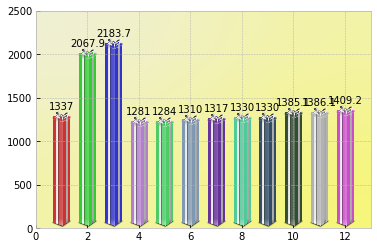

In [38]:
import numpy as np

from matplotlib import cbook, colors as mcolors
from matplotlib.image import AxesImage
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox, TransformedBbox, BboxTransformTo


class RibbonBox:

    original_image = plt.imread(
        cbook.get_sample_data("Minduka_Present_Blue_Pack.png"))
    cut_location = 70
    b_and_h = original_image[:, :, 2:3]
    color = original_image[:, :, 2:3] - original_image[:, :, 0:1]
    alpha = original_image[:, :, 3:4]
    nx = original_image.shape[1]

    def __init__(self, color):
        rgb = mcolors.to_rgba(color)[:3]
        self.im = np.dstack(
            [self.b_and_h - self.color * (1 - np.array(rgb)), self.alpha])

    def get_stretched_image(self, stretch_factor):
        stretch_factor = max(stretch_factor, 1)
        ny, nx, nch = self.im.shape
        ny2 = int(ny*stretch_factor)
        return np.vstack(
            [self.im[:self.cut_location],
             np.broadcast_to(
                 self.im[self.cut_location], (ny2 - ny, nx, nch)),
             self.im[self.cut_location:]])


class RibbonBoxImage(AxesImage):
    zorder = 1

    def __init__(self, ax, bbox, color, *, extent=(0, 1, 0, 1), **kwargs):
        super().__init__(ax, extent=extent, **kwargs)
        self._bbox = bbox
        self._ribbonbox = RibbonBox(color)
        self.set_transform(BboxTransformTo(bbox))

    def draw(self, renderer, *args, **kwargs):
        stretch_factor = self._bbox.height / self._bbox.width

        ny = int(stretch_factor*self._ribbonbox.nx)
        if self.get_array() is None or self.get_array().shape[0] != ny:
            arr = self._ribbonbox.get_stretched_image(stretch_factor)
            self.set_array(arr)

        super().draw(renderer, *args, **kwargs)


def main():
    fig, ax = plt.subplots()

    years = np.arange(1, 13)
    heights = l
    box_colors = [
        (0.8, 0.2, 0.2),
        (0.2, 0.8, 0.2),
        (0.2, 0.2, 0.8),
        (0.7, 0.5, 0.8),
        (0.3, 0.8, 0.4),
        (0.5, 0.6, 0.7),
        (0.4, 0.2, 0.6),
        (0.3, 0.8, 0.6),
        (0.2, 0.3, 0.4),
        (0.2, 0.3, 0.2),
        (0.7, 0.7, 0.7),
        (0.8, 0.3, 0.8)
    ]

    for year, h, bc in zip(years, heights, box_colors):
        bbox0 = Bbox.from_extents(year - 0.4, 0., year + 0.4, h)
        bbox = TransformedBbox(bbox0, ax.transData)
        ax.add_artist(RibbonBoxImage(ax, bbox, bc, interpolation="bicubic"))
        ax.annotate(str(h), (year, h), va="bottom", ha="center")

    ax.set_xlim(0,13)
    ax.set_ylim(0, 2500)

    background_gradient = np.zeros((2,2, 4))
    background_gradient[:, :, :3] = [1, 1, 0]
    background_gradient[:, :, 3] = [[0.1, 0.3], [0.3, 0.5]]  # alpha channel
    ax.imshow(background_gradient, interpolation="bicubic", zorder=0.1,
              extent=(0, 1, 0, 1), transform=ax.transAxes, aspect="auto")

    plt.show()
    

main()


Text(0.5, 0.98, 'La moyenne de nombre d options pour toutes les versions (10 derniers compilations)')

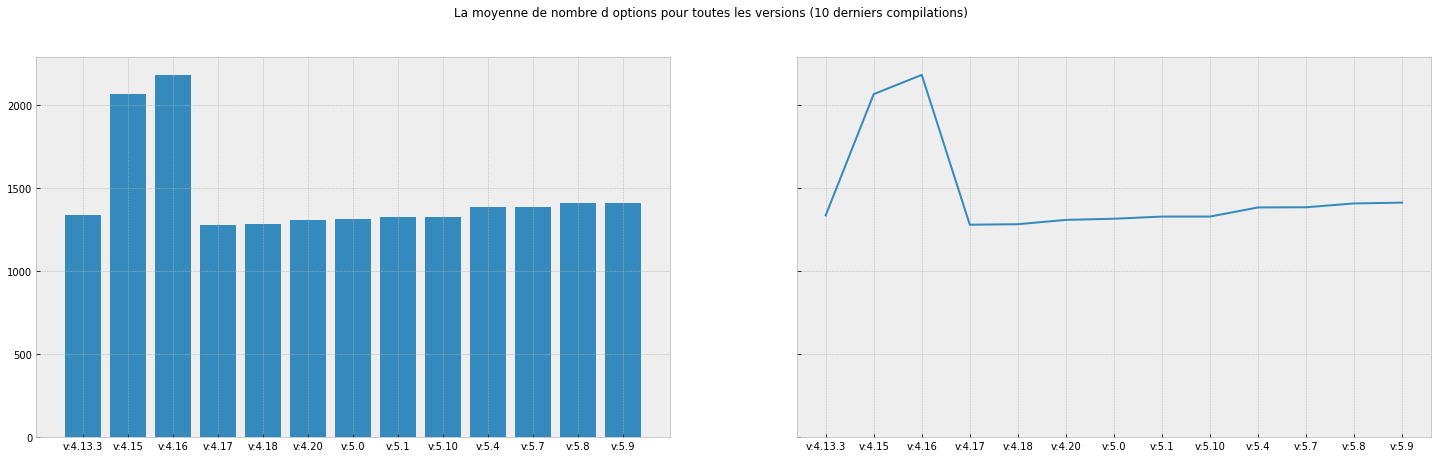

In [39]:
import matplotlib.pyplot as plt

names = ['v:4.13.3','v:4.15','v:4.16','v:4.17','v:4.18','v:4.20','v:5.0','v:5.1','v:5.10','v:5.4','v:5.7','v:5.8','v:5.9']
values = l

fig, axs = plt.subplots(1, 2, figsize=(25,7), sharey=True)

axs[0].bar(names, values)
axs[1].plot(names, values)

fig.suptitle('La moyenne de nombre d options pour toutes les versions (10 derniers compilations)')


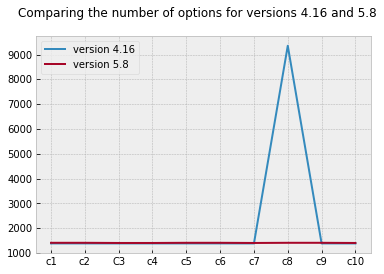

In [40]:
import numpy as np
import matplotlib.pyplot as plt

v1 = y1
v2 = y2
activity = ["c1", "c2", "C3", "c4", "c5", "c6","c7","c8", "c9", "c10"]

fig, ax = plt.subplots()
ax.plot(activity, v1, label="version 4.16")
ax.plot(activity, v2, label="version 5.8")
fig.suptitle('Comparing the number of options for versions 4.16 and 5.8')
ax.legend()

plt.show()


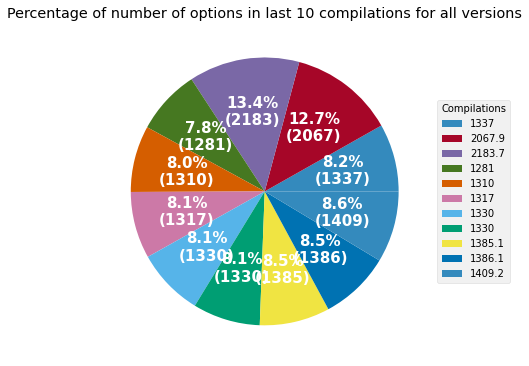

In [41]:
import numpy as np 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 10), subplot_kw=dict(aspect="equal"))
s = [] 
length = len(l) 
i=0 
while i < length: 
    s.append(str(l[i])) 
    i += 1 
recipe = [s[0], s[1], s[2], s[3], s[5], s[6], s[7], s[8], s[9],s[10],s[11]]

data = [float(x.split()[0]) for x in recipe] 
ingredients = [x.split()[-1] for x in recipe]

def func(pct, allvals): 
    absolute = int(pct/100.*np.sum(allvals)) 
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

ax.legend(wedges, ingredients, title="Compilations", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Percentage of number of options in last 10 compilations for all versions")

plt.show()

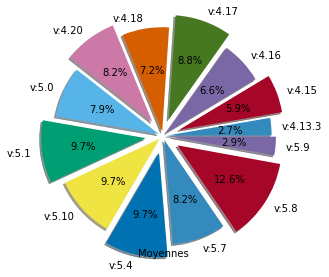

In [42]:
import matplotlib.pyplot as plt
import sys
import pandas as pd

plt.style.use('bmh')
df = pd.read_csv('moyenne.csv')

# All Brands
x = df['Name']
y = df['Value']

# Specified Brands
#specified = df.loc[df['Company'] == 'Samsung']
#x = specified['Model']
#y = specified['Price']

# Bar chart
plt.xlabel('Moyennes', fontsize=10)
#plt.ylabel('Price($)', fontsize=16)
#plt.bar(x, y)

# Pie chart
plt.pie(y, labels=x, radius=1.2,autopct='%0.01f%%', shadow=True, explode=[.05,.2,.05,.2,.05,.2,.05,.2,.05,.2,.05,.2,.1])

# Line Graph
#plt.xlabel('Moyenne', fontsize=15)
#plt.ylabel('', fontsize=16)
#plt.scatter(x, y)
#plt.plot(x, y)

plt.show()